<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Hour-vs-Score-Prediction/blob/main/Prediction_using_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR:- KSHITEZ PRATAP SINGH**

# **Prediction using Supervised Learning**

### **Description**  
Student performance analysis and prediction using datasets has become an essential component of modern education systems. With the increasing availability of data on student demographics, academic history, and other relevant factors, schools and universities are using advanced analytics and machine learning algorithms to gain insights into student performance and predict future outcomes.

![picture](https://drive.google.com/uc?export=view&id=1HVND2NuB5bSRuBVJIb_0WIrInODcOYG9)

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

This approach helps educators identify areas of improvement, personalize learning experiences, and provide targeted support to struggling students. Furthermore, student performance analysis and prediction can also aid in decision-making processes for school administrators and policymakers, helping them allocate resources more effectively.


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d peterkmutua/student-hours-scores

student-hours-scores.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/student-hours-scores.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing the Essential Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
from fasteda import fast_eda

### **Creating DataFrame**

In [6]:
df=pd.read_csv('/content/Hours_and_Scores.csv')
s,k=df.shape
print('Number of Rows: ',s)
print('Number of Columns: ',k)

Number of Rows:  25
Number of Columns:  3


### **Exploring the Dataset**

In [7]:
df.head(5)

,Unnamed: 0,Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30


In [8]:
df.columns

Index(['Unnamed: 0', 'Hours', 'Scores'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     object 
 1   Hours       25 non-null     float64
 2   Scores      25 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes


### **Checking for Null Value**

In [10]:
# Checking for null value so that Data Impuation can be done
df.isnull().mean()*100

Unnamed: 0    0.0
Hours         0.0
Scores        0.0
dtype: float64

### **Dropping Unwanted Column**

In [11]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Independent varibles**

In [12]:
x=df.iloc[:,:-1].values  #independent Colum
print('The Independent Variable','\n',x)

The Independent Variable 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


### **Dependent varibles**

In [13]:
#dependent variable will be in 1d
y=df.iloc[:,-1].values   #dependent Column
print('The Dependent Variable','\n',y)

The Dependent Variable 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### **Exploratory Data Analysis**

DataFrame Head:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


DataFrame Tail:


,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(25, 2)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Hours,25,5.012,4.8,2.525,1.1,2.7,4.8,7.4,9.2,0.178722,-1.286836
Scores,25,51.48,47,25.287,17,30,47,75,95,0.219686,-1.401569


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



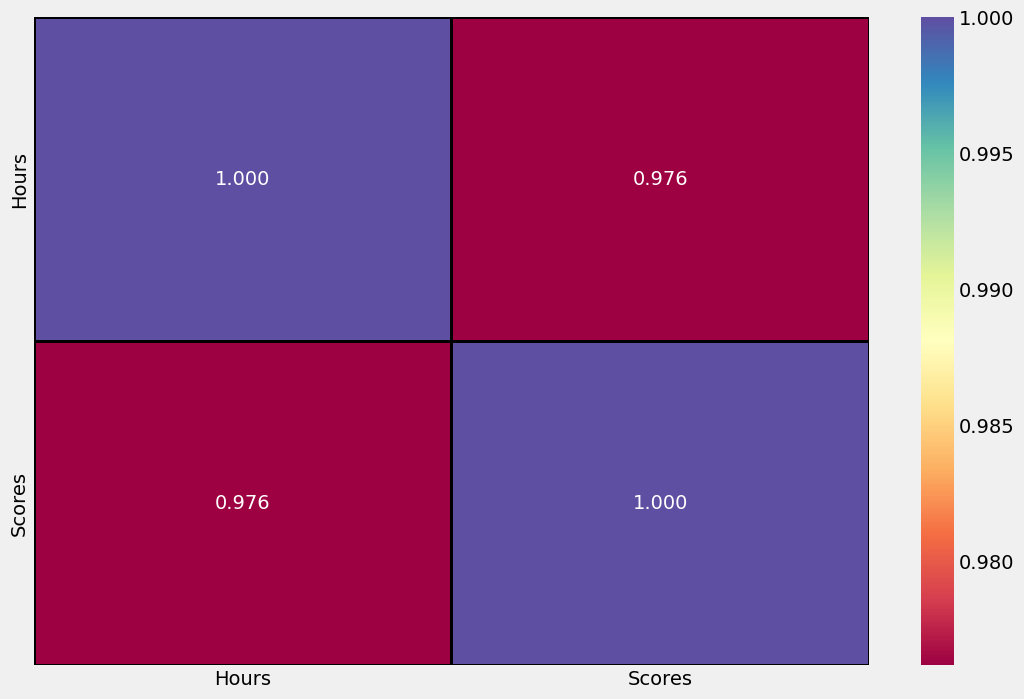

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



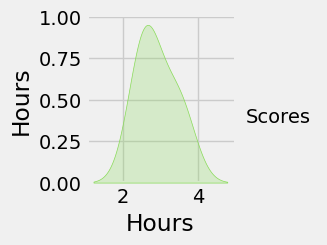

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



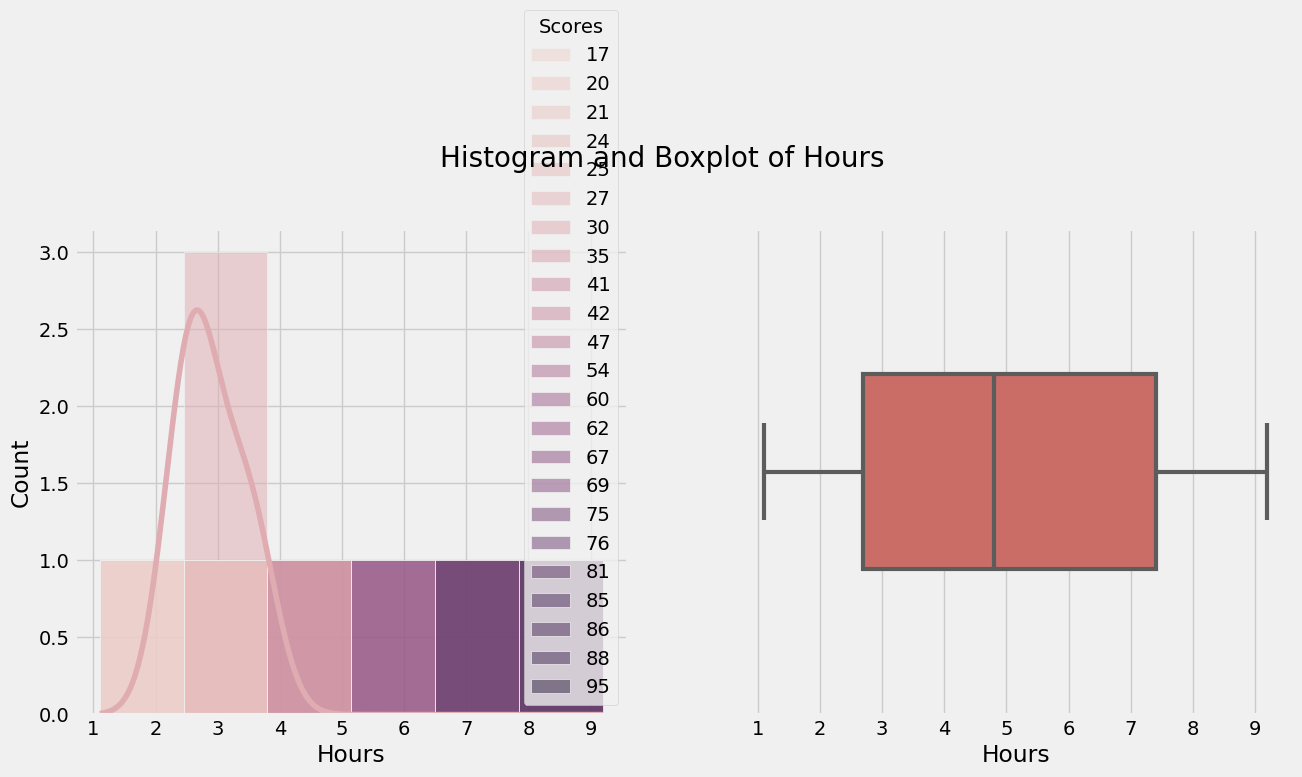

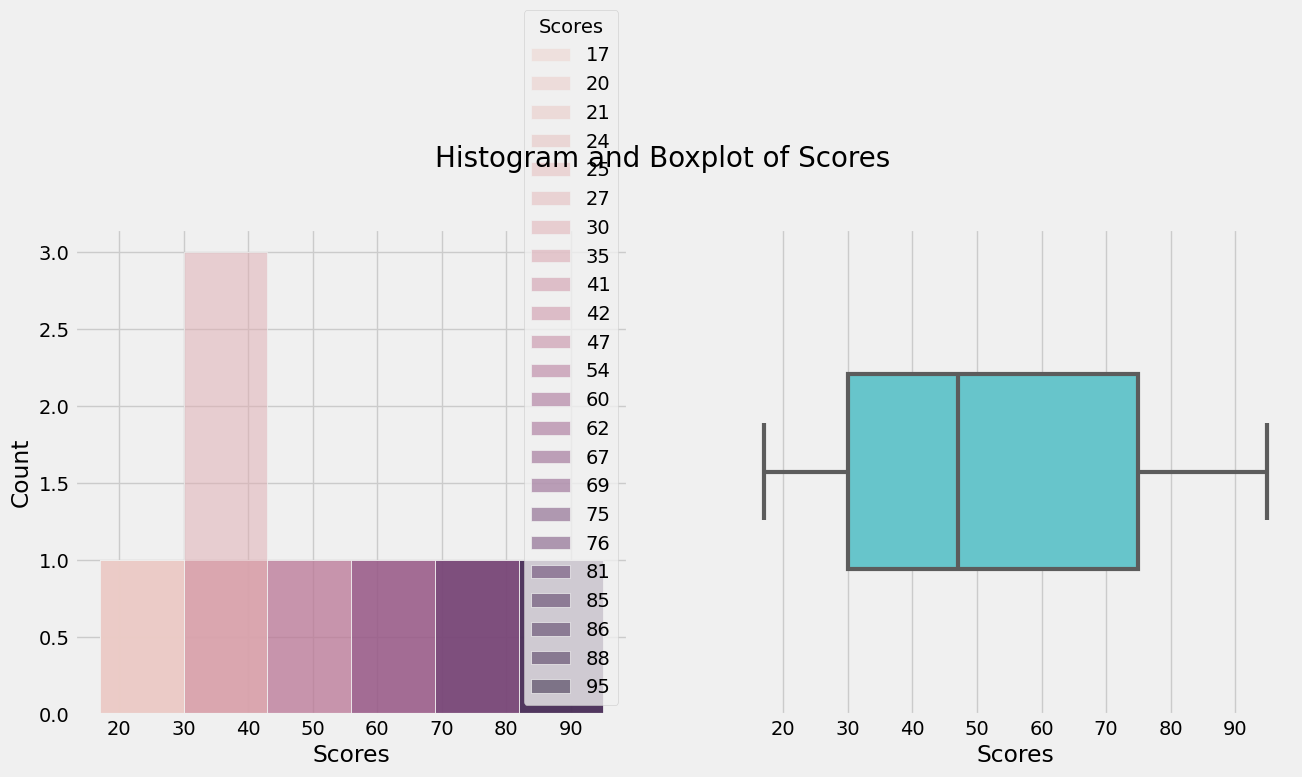

In [14]:
fast_eda(df,target='Scores')

### **Splitting the Dataset**

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)


### **Linear Regression**

In [16]:
regressor=LinearRegression()

#Since we are not replacing that is why we are not using tranform()
regressor.fit(x_train,y_train)

LinearRegression()

### **Visualisation with Train Data**

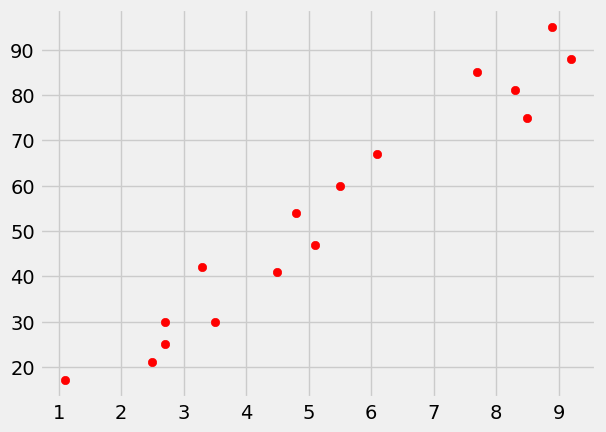

In [17]:
#All the points are not in aline but they are in a line-shape. tus, it's linear.
# and can be represented using linear-line equation

plt.scatter(x_train,y_train,color='red')
plt.show()

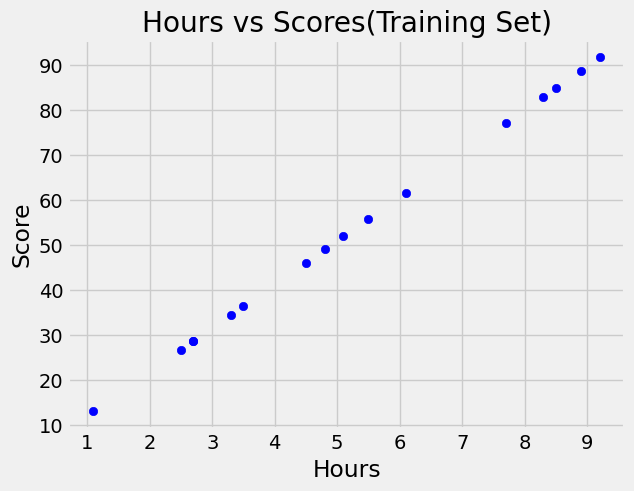

In [18]:
# predict() it will predict values for y for every x
# we are using x_train not y_train because y_train is dependent
# predict(x_train) will be compared with y_train and we will see the difference, the min error the good model
# Always using x_train for prediction

plt.scatter(x_train,regressor.predict(x_train),color='blue')
plt.title('Hours vs Scores(Training Set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()


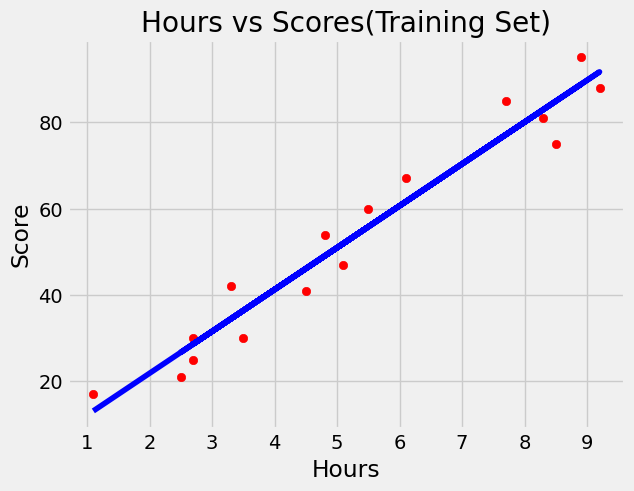

In [19]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Hours vs Scores(Training Set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### **Visualisation with Test Data**

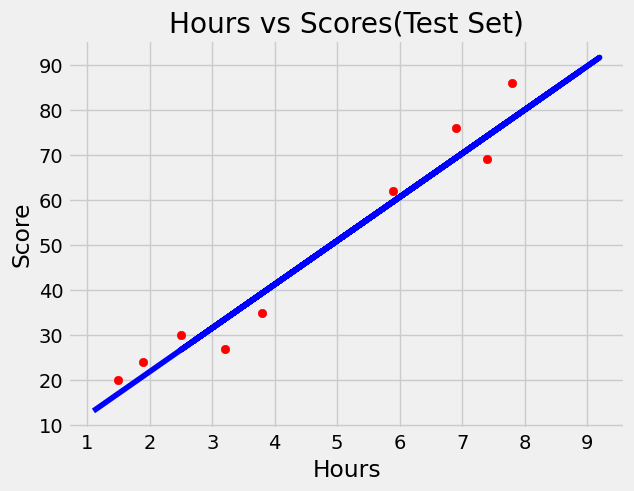

In [20]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train, regressor.predict(x_train),color='blue')
plt.title('Hours vs Scores(Test Set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### **Coefficient and Regression Value**

In [21]:
# getting the final linear regression equation with the values of the coefficient

print('Coefficient :','\n',regressor.coef_)       #slope or m or B1
print('\n')
print('Regressor :','\n',regressor.intercept_)  #y-intercept when x value or year_exp = 0 or c or B0

Coefficient : 
 [9.69062469]


Regressor : 
 2.5069547569547197


### **Model Evaluation**

In [22]:
print('R Squared: {:.2f}'.format(regressor.score(x,y)*100))

R Squared: 95.26


### **Prediction**

In [23]:
y_pred2=regressor.predict([[9.25]])
print('Y_pred_2 :','\n',y_pred2)

Y_pred_2 : 
 [92.14523315]
